## PyTorch Workflow


#### Neural Networks (torch.nn Module)

The torch.nn module provides tools to build neural networks, including layers, activation functions, and loss functions. Models are defined by subclassing nn.Module.


In [106]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.8.0+cpu


In [107]:
weight = 0.7
bias = 0.3


start = 0
end=1
gap=0.02

X = torch.arange(start, end, gap).unsqueeze(dim=1)

y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

#### splitting data in traing and testing data


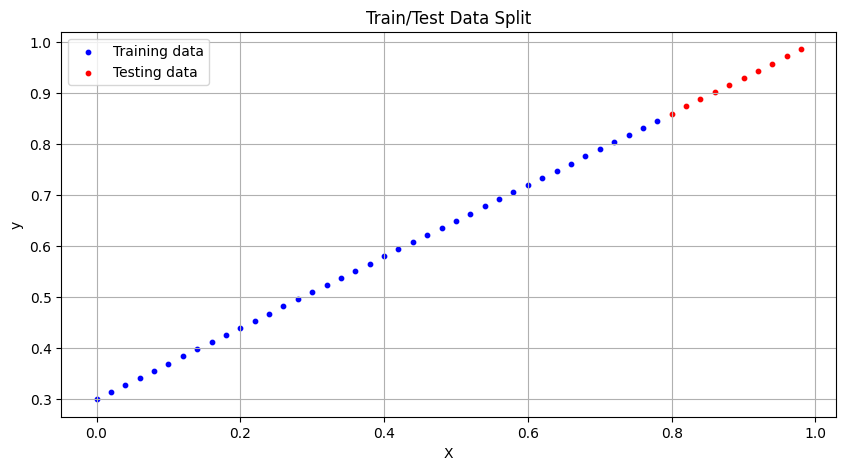

In [108]:
import torch
import matplotlib.pyplot as plt

# Data setup
weight = 0.7
bias = 0.3
start = 0
end = 1
gap = 0.02

X = torch.arange(start, end, gap).unsqueeze(dim=1)
y = weight * X + bias

# Train-test split (80/20)
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], y[:train_split]
X_test, Y_test = X[train_split:], y[train_split:]

# Plotting function
def plot_predictions(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    predictions=None
):
    plt.figure(figsize=(10, 5))
    plt.scatter(train_data, train_labels, c='b', s=10, label="Training data")
    plt.scatter(test_data, test_labels, c='r', s=10, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', s=10, label="Predictions")

    plt.title("Train/Test Data Split")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Show the plot
plot_predictions()


### Building Model


In [109]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize weights and bias as parameters
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward pass (computes predictions)
    def forward(self, x):
        return self.weights * x + self.bias


# Instantiate the model
model = LinearRegressionModel()

# Example input
x = torch.tensor([1.0, 2.0])

# Forward pass
output = model(x)
print("Output:", output)


Output: tensor([0.3945, 1.2800], grad_fn=<AddBackward0>)


| Component        | Purpose                                         |
| ---------------- | ----------------------------------------------- |
| `torch.nn`       | Neural network building blocks                  |
| `nn.Parameter()` | Trainable tensor, tracked for gradients         |
| `nn.Module`      | Base class for all models, requires `forward()` |


In [110]:
torch.manual_seed(40)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.9307], requires_grad=True),
 Parameter containing:
 tensor([-0.3482], requires_grad=True)]

In [111]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.9307])), ('bias', tensor([-0.3482]))])

#### MakingPredictions


In [112]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [113]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3964],
        [0.4150],
        [0.4336],
        [0.4522],
        [0.4709],
        [0.4895],
        [0.5081],
        [0.5267],
        [0.5453],
        [0.5639]])

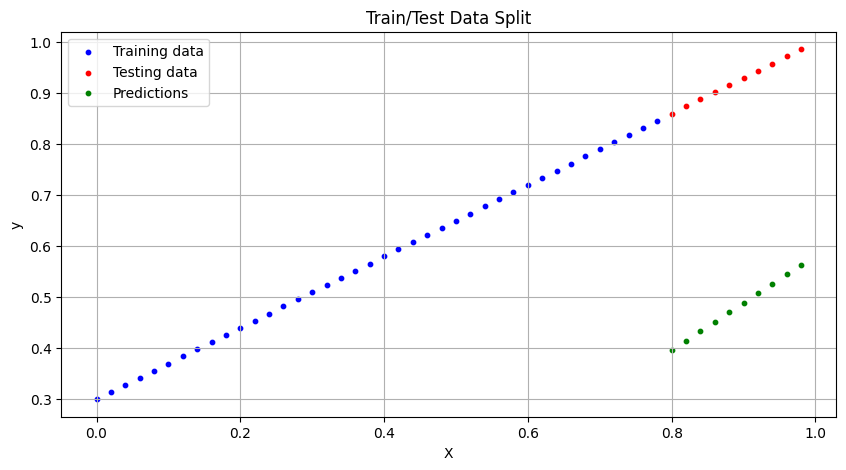

In [114]:
plot_predictions(predictions=y_preds)

In [115]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.9307])), ('bias', tensor([-0.3482]))])

In [116]:
# setup a loss function

loss_fn = nn.L1Loss()


# setup an optimizer
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.01
)

In [117]:
with torch.no_grad():
    list(model_0.parameters())

#### Building training loop (and a testing loop) in PyTorch


In [118]:
torch.manual_seed(40)
model_0 = LinearRegressionModel()
loss_fn = nn.L1Loss()  # Mean Absolute Error
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [119]:
epochs = 300

for epoch in range(epochs):
    # Training
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        y_test_pred = model_0(X_test)
        test_loss = loss_fn(y_test_pred, Y_test)

    if epoch % 20 == 0:
        print(f"Epoch {epoch:3d} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")

print("\nFinal model parameters:", model_0.state_dict())

Epoch   0 | Train Loss: 0.5582 | Test Loss: 0.4294
Epoch  20 | Train Loss: 0.3278 | Test Loss: 0.1599
Epoch  40 | Train Loss: 0.1126 | Test Loss: 0.0945
Epoch  60 | Train Loss: 0.0786 | Test Loss: 0.1611
Epoch  80 | Train Loss: 0.0707 | Test Loss: 0.1605
Epoch 100 | Train Loss: 0.0638 | Test Loss: 0.1481
Epoch 120 | Train Loss: 0.0569 | Test Loss: 0.1322
Epoch 140 | Train Loss: 0.0500 | Test Loss: 0.1164
Epoch 160 | Train Loss: 0.0432 | Test Loss: 0.0998
Epoch 180 | Train Loss: 0.0363 | Test Loss: 0.0840
Epoch 200 | Train Loss: 0.0294 | Test Loss: 0.0681
Epoch 220 | Train Loss: 0.0226 | Test Loss: 0.0522
Epoch 240 | Train Loss: 0.0157 | Test Loss: 0.0357
Epoch 260 | Train Loss: 0.0088 | Test Loss: 0.0198
Epoch 280 | Train Loss: 0.0019 | Test Loss: 0.0040

Final model parameters: OrderedDict({'weights': tensor([0.7018]), 'bias': tensor([0.2903])})


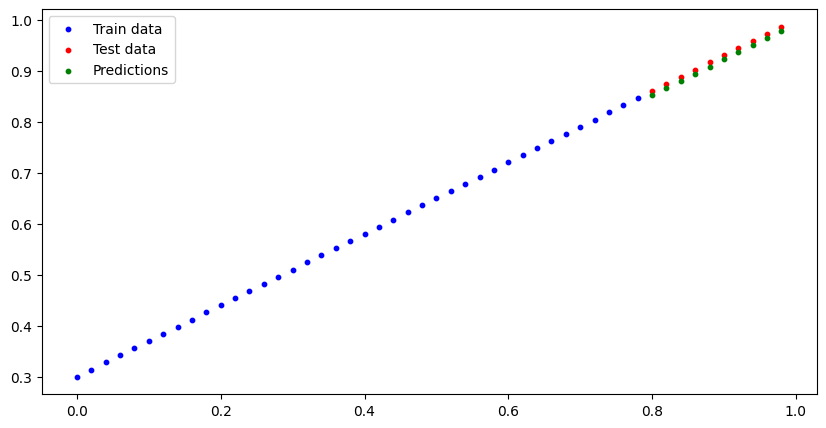

In [120]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.figure(figsize=(10, 5))
    plt.scatter(train_data, train_labels, c='b', s=10, label="Train data")
    plt.scatter(test_data, test_labels, c='r', s=10, label="Test data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c='g', s=10, label="Predictions")
    plt.legend()
    plt.show()

plot_predictions(X_train, Y_train, X_test, Y_test, y_test_pred)